In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# !! need to insert this path to load h5py without errors!
#  (otherwise Python tries to load the h5py in default site-packages and throws an ImportError)
import sys
sys.path.insert(0, '/work2/08811/aew492/frontera/venv/illustris3.9/lib/python3.9/site-packages')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import interpolate
import pickle
import astropy.units as u
import astropy.cosmology.units as cu
import os
import illustris_python as il
from colossus.cosmology import cosmology
import symbolic_pofk.syrenhalofit as syrenhalofit
from mcfit import P2xi

sys.path.insert(0, '/work2/08811/aew492/frontera/small-scale_cross-corrs/code')
from xcorr_cases import HSC_Xcorr
import tools

### compare linear and nonlinear matter c.f.s

In [4]:
# inputs
cosmo_model = 'planck15'
z = 1.
rmin = 0.1
rmax = 100
nbins = 30
r_edges = np.logspace(np.log10(rmin), np.log10(rmax), nbins+1)
r_avg = 0.5 * (r_edges[1:] + r_edges[:-1])

# linear
linear_2pcf = tools.linear_2pcf(z, r_avg, cosmo_model=cosmo_model)

In [5]:
# nonlinear

# same cosmological params as the linear case
cosmo = cosmology.setCosmology(cosmo_model, persistence='r')  # persistence='r' sets this to read-only

# scale factor
a = 1 / (1 + z)

# Define k range
kmin = 1e-2
kmax = 8
nk = 500
k = np.logspace(np.log10(kmin), np.log10(kmax), nk)

pk_halofit = syrenhalofit.run_halofit(k, cosmo.sigma8, cosmo.Om(z), cosmo.Ob(z), cosmo.h, cosmo.ns, a, emulator='fiducial',
                                  extrapolate=True, which_params='Bartlett', add_correction=False)
pk_halofit_corr = syrenhalofit.run_halofit(k, cosmo.sigma8, cosmo.Om(z), cosmo.Ob(z), cosmo.h, cosmo.ns, a, emulator='fiducial',
                                  extrapolate=True, which_params='Bartlett', add_correction=True)

Text(0.5, 1.0, 'Matter power spectra, Bartlett et al. 2023 (z=1.0)')

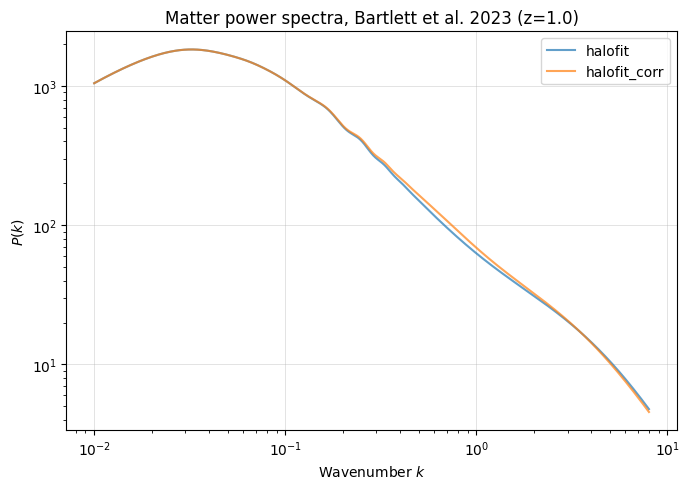

In [6]:
fig, ax = plt.subplots(figsize=(7,5), tight_layout=True)

ax.plot(k, pk_halofit, alpha=0.7, label='halofit')
ax.plot(k, pk_halofit_corr, alpha=0.7, label='halofit_corr')

ax.grid(alpha=0.5, lw=0.5)
ax.set_xlabel('Wavenumber $k$')
ax.set_ylabel('$P(k)$')
ax.legend()
ax.loglog()
ax.set_title(f'Matter power spectra, Bartlett et al. 2023 (z={z})')

In [7]:
# transform to correlation function
r, xi = P2xi(k)(pk_halofit)
r, xi_corr = P2xi(k)(pk_halofit_corr)

Text(0.5, 1.0, 'Matter correlation functions (z=1.0)')

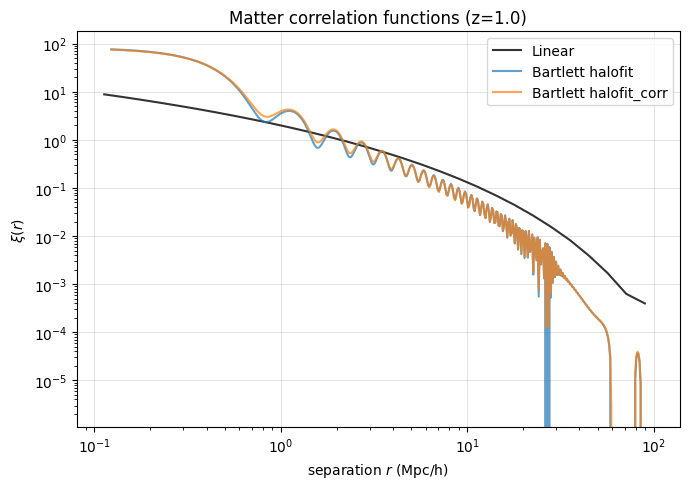

In [8]:
fig, ax = plt.subplots(figsize=(7,5), tight_layout=True)

ax.plot(r_avg, linear_2pcf, c='k', alpha=0.8, label='Linear')
ax.plot(r, xi, alpha=0.7, label='Bartlett halofit')
ax.plot(r, xi_corr, alpha=0.7, label='Bartlett halofit_corr')

ax.grid(alpha=0.5, lw=0.5)
ax.set_xlabel('separation $r$ (Mpc/h)')
ax.set_ylabel(r'$\xi(r)$')
ax.legend()
ax.loglog()
ax.set_title(f'Matter correlation functions (z={z})')